<a href="https://colab.research.google.com/github/Elma-dev/Student_performance_prediction/blob/main/Exam_Score_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
data=pd.read_csv("exams.csv")

In [11]:
data.head()
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62
999,male,group D,high school,standard,none,58,47,45


In [12]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<Axes: >

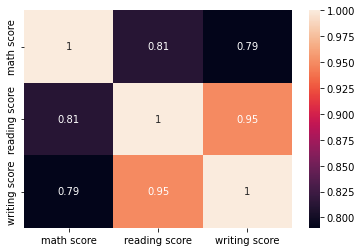

In [37]:
sns.heatmap(data.corr(),annot=True)

<Axes: xlabel='writing score'>

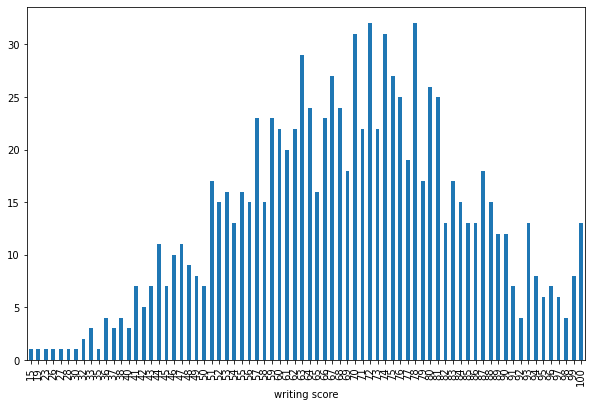

In [69]:
data.groupby('writing score')['writing score'].count().plot.bar()

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


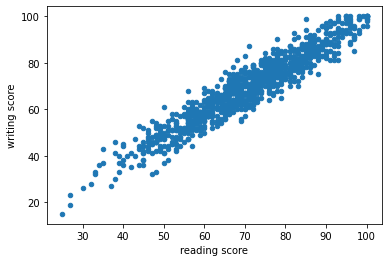

In [47]:
data.plot.scatter(x='reading score',y='writing score')
plt.show()

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


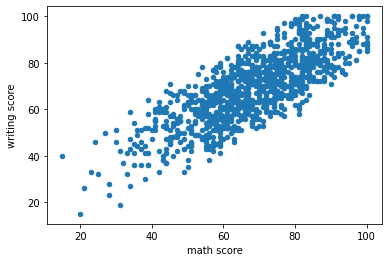

In [49]:
data.plot.scatter(x='math score',y='writing score')
plt.show()

<Axes: xlabel='gender', ylabel='writing score'>

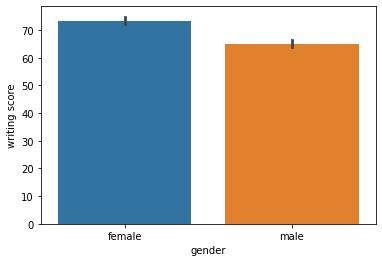

In [51]:
sns.barplot(data=data,x='gender',y='writing score')

In [56]:
data.groupby('gender')['writing score'].mean().to_frame().reset_index()

,gender,writing score
0,female,73.439024
1,male,64.976378


<Axes: xlabel='gender', ylabel='writing score'>

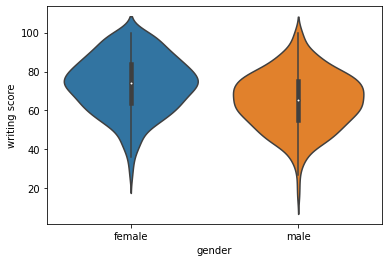

In [57]:
sns.violinplot(data=data,x='gender',y='writing score')

<Axes: xlabel='race/ethnicity', ylabel='writing score'>

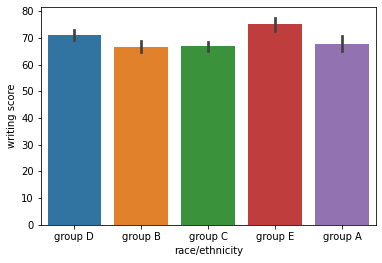

In [58]:
sns.barplot(data=data,x='race/ethnicity',y='writing score')

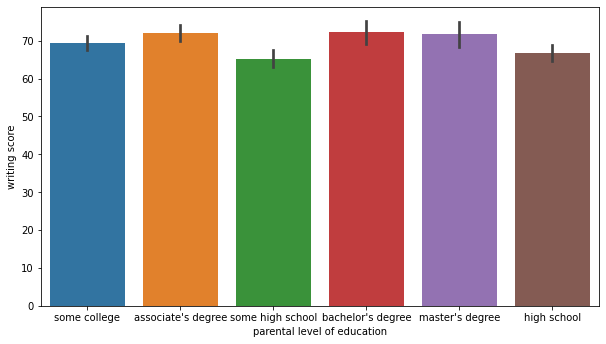

In [61]:
sns.barplot(data=data,x='parental level of education',y='writing score')
plt.rcParams["figure.figsize"] = (10,6.5)

<Axes: xlabel='lunch', ylabel='writing score'>

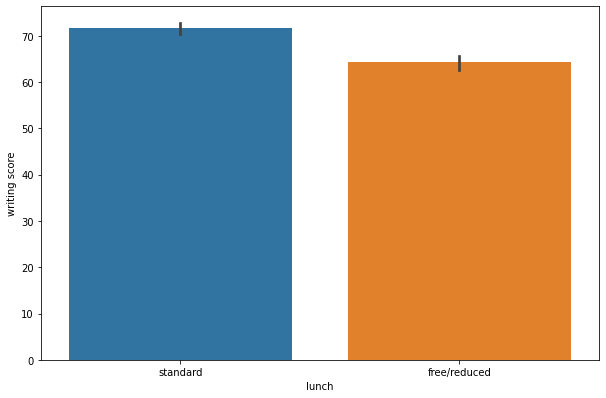

In [62]:
sns.barplot(data=data,x='lunch',y='writing score')

<Axes: xlabel='test preparation course', ylabel='writing score'>

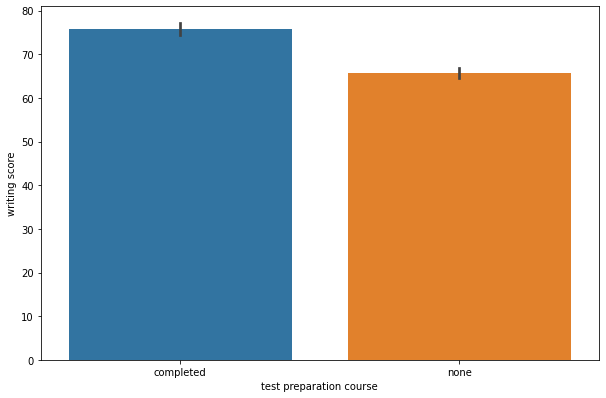

In [63]:
sns.barplot(data=data,x='test preparation course',y='writing score')

#Preprocessing Data

In [71]:
data.isna().count().to_frame()

,0
gender,1000
race/ethnicity,1000
parental level of education,1000
lunch,1000
test preparation course,1000
math score,1000
reading score,1000
writing score,1000


In [72]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [73]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [100]:
numerical_data=['math score','reading score']
categorical_data=['gender','parental level of education','lunch','test preparation course']

In [77]:
#ENCODING DATA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [96]:
x=data[numerical_data+categorical_data]
y=data['writing score']

In [99]:
colTr=ColumnTransformer(transformers=[('encode',OneHotEncoder(),categorical_data)],remainder='passthrough')
x=colTr.fit_transform(x)

Split Data

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Train Model

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [113]:
linReg=LinearRegression()
svr=SVR()
linReg.fit(x_train,y_train)
svr.fit(x_train,y_train)

SVR()

In [122]:
from sklearn.metrics import mean_squared_error
print("Lin Reg MSE : ",mean_squared_error(y_test,linReg.predict(x_test)))
print("score",linReg.score(x_test,y_test))

Lin Reg MSE :  14.888824990275406
score 0.9368147785715791


In [125]:
mean_squared_error(y_test,svr.predict(x_test))
print("SVR MSE : ",mean_squared_error(y_test,svr.predict(x_test)))
print("score",svr.score(x_test,y_test))

SVR MSE :  31.476575990215473
score 0.8664196519840018
